In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [488]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [738]:
import matplotlib.patches as patches


In [5]:
fig_width_pt = 200  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.1*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [6]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.linspace(0,1,9)]) 

# Destab off-lattice

In [592]:
prof=np.loadtxt("/home/invites/benvegnen/AI2D/AI2D_off_lattice/films_nei_area_unit/D0.08/f_profiles.dat.gz")

In [594]:
prof.shape

(100000, 400)

In [815]:
fig_width_pt = 100  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


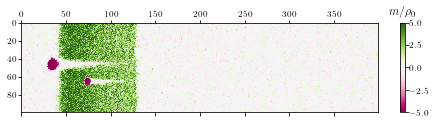

In [816]:
t=125

v0=5
plt.matshow(prof[t*100:(t+1)*100,:]/3, cmap='PiYG', vmin=-v0, vmax=v0)
cbar=plt.colorbar( shrink=0.8)
cbar.ax.set_title(r'$m/\rho_0$', rotation=0)

plt.tight_layout(pad=0.01)

plt.savefig('destab_band_offlat.pdf', dpi=800);

# Phase diagrams

In [515]:
data={}
data['seq']=np.loadtxt("data_phase_diag_onlat_seq.dat")
data['par']=np.loadtxt("data_phase_diag_onlat_par.dat")
data['off']=np.loadtxt("data_phase_diag_offlat.dat")

In [516]:
data['seq']

array([[0.1       , 8.05959438, 1.51789623],
       [0.2       , 6.78039758, 1.44981785],
       [0.3       , 6.03178368, 1.37647654],
       [0.4       , 5.45992071, 1.34118906],
       [0.6       , 4.79024772, 1.29759292],
       [0.8       , 4.32507649, 1.28991878],
       [1.        , 3.98514463, 1.27223698],
       [1.2       , 3.71651353, 1.26662708],
       [1.4       , 3.5077588 , 1.28422076]])

In [756]:
fig_width_pt = 300  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.1*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          "font.family": "Computer Modern Roman",
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

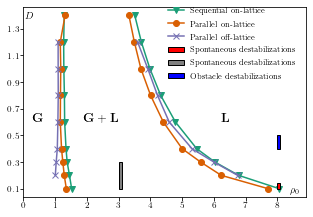

In [805]:
markers={'seq':'v-', 'par':'o-', 'off':'x-'}
labels={'seq':r'Sequential on-lattice', 'par':'Parallel on-lattice', 'off':'Parallel off-lattice'}
for t in ['seq', 'par', 'off']:
    l=plt.plot(data[t][:,1], data[t][:,0], markers[t], label=labels[t])
    c=l[0].get_color()
    plt.plot(data[t][:,2], data[t][:,0], markers[t], color=c)

plt.xlim(0., 8.9)

plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3])

plt.xlabel(r'$\rho_0$', labelpad=-23, x=0.96)
plt.ylabel(r'$D$', labelpad=-22, y=0.93, rotation=0)

plt.text(s=r'$\mathbf{G}$', x=0.03, y=0.4, transform=plt.gca().transAxes, fontsize=13)
plt.text(s=r'$\mathbf{G+L}$', x=0.21, y=0.4, transform=plt.gca().transAxes, fontsize=13)
plt.text(s=r'$\mathbf{L}$', x=0.7, y=0.4, transform=plt.gca().transAxes, fontsize=13)


rect = patches.Rectangle((8, 0.1), 0.1, 0.04,
                         linewidth=1, edgecolor='k', facecolor='r', zorder=10,
                         label=r'Spontaneous destabilizations')
plt.gca().add_patch(rect)


rect = patches.Rectangle((3, 0.1), 0.1, 0.2, linewidth=1, edgecolor='k', facecolor='gray', zorder=10,
                         label=r'Spontaneous destabilizations')
plt.gca().add_patch(rect)

rect = patches.Rectangle((8, 0.4), 0.1, 0.1, linewidth=1, edgecolor='k', facecolor='b', zorder=10,
                        label=r'Obstacle destabilizations')
plt.gca().add_patch(rect)


    
l=plt.legend(loc=(0.5,0.6), fontsize=8)
l.set_in_layout(False)

plt.tight_layout(pad=0.01)
plt.savefig('phase_diag_AI2D.pdf', dpi=400);

# Asters in 2D

In [480]:
df=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/spontaneous_destab_AIMrates/aster_longrun/D0.05/f_profiles.dat', sep=' ', names=['t']+[str(a) for a in np.arange(100)], index_col=False)

2000.12


Text(0.5, 1.0, '$t=2000$')

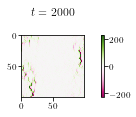

In [485]:
kt=0
v0=np.min(df.values)/2
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
print(t0)
X=df[df.t==t0].drop(columns=['t',])

cmap = plt.get_cmap('PiYG')
#cmap.set_under('black')

plt.imshow(X, cmap=cmap, vmin=-v0, vmax=v0)
cbar = plt.colorbar()


plt.title(r'$t=%d$'%t0, pad=20)


In [512]:
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.5*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

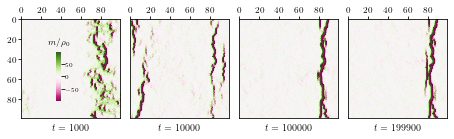

In [514]:
fig, ax = plt.subplots(1, 4)
xmin, xmax= 0,100
v0=100
xlab,ylab=0.5,-0.12

kt=10
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
X=np.roll(df[df.t==t0].drop(columns=['t',]).values, -10)
img=ax[0].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0].text(s=r'$t=%d$'%t0, x=xlab, y=ylab, transform=ax[0].transAxes, horizontalalignment='center')


kt=100
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
X=np.roll(df[df.t==t0].drop(columns=['t',]).values, -10)
ax[1].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[1].set_yticks([])
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1].text(s=r'$t=%d$'%t0, x=xlab, y=ylab, transform=ax[1].transAxes, horizontalalignment='center')


kt=1000
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
X=np.roll(df[df.t==t0].drop(columns=['t',]).values, -10)
ax[2].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[2].set_yticks([])
ax[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[2].text(s=r'$t=%d$'%t0, x=xlab, y=ylab, transform=ax[2].transAxes, horizontalalignment='center')

kt=-1
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
X=np.roll(df[df.t==t0].drop(columns=['t',]).values, -10)
ax[3].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[3].set_yticks([])
ax[3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[3].text(s=r'$t=%d$'%t0, x=xlab, y=ylab, transform=ax[3].transAxes, horizontalalignment='center')

plt.subplots_adjust(left=0.04,
    bottom=0.01,
    right=0.99,
    top=0.93,
    wspace=0.1,
    hspace=0.1,)

#cbaxes = inset_axes(ax[0], width="6%", height="50%", loc=8, )
cbaxes = inset_axes(ax[0], width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.3,0.22,.05,.5), bbox_transform=ax[0].transAxes)
cbar=plt.colorbar(img, cax=cbaxes, ticks=[-50, 0.,50], orientation='vertical')
cbar.outline.set_visible(False)


cbar.ax.set_title(r'$m/\rho_{\rm 0}$', rotation=0, fontsize=9)
cbar.ax.tick_params(labelsize=6)

plt.savefig('asters_2D.pdf', dpi=400)

# 1 box no spreading

In [7]:
k=1
df_m=pd.read_csv('1nei/f_profiles_m_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(200)], index_col=False, dtype=np.float64)
df_rho=pd.read_csv('1nei/f_profiles_rho_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(200)], index_col=False, dtype=np.float64)
df_m.shape

(8800, 201)

(25, 120)

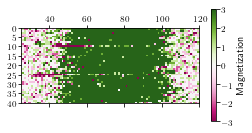

In [12]:
kt=50
t0=np.unique(df_m.t)[kt]
X_m=df_m[df_m.t==t0].drop(columns=['t'])
#v0=np.min(np.min(X_m))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

cbar = plt.colorbar(img)
cbar.set_label('Magnetization')
plt.ylim(40, 0)
plt.xlim(25, 120)



# 9 boxes

In [9]:
k=0
df_m9=pd.read_csv('9nei/f_profiles_m_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
df_rho9=pd.read_csv('9nei/f_profiles_rho_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
df_m.shape

(8800, 201)

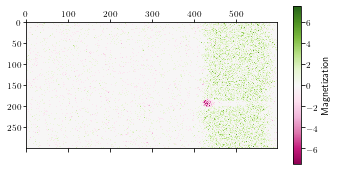

In [51]:
kt=60
t0=np.unique(df_m9.t)[kt]

X_m=df_m9[df_m9.t==t0].drop(columns=['t']).values

v0=np.min(np.min(X_m))/2
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
cbar=plt.colorbar()
cbar.set_label('Magnetization')
# plt.xlim(370,550)
# plt.ylim(150,241)

# plt.xticks(np.arange(370,550, 15), np.arange(np.int64(370/3),np.int64(550/3), 5));
# plt.yticks(np.arange(150,241, 15), np.arange(np.int64(150/3),np.int64(241/3), 5)[::-1]);

In [19]:
fig_width_pt = 300  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.1*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

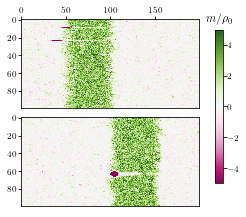

In [108]:
fig, ax = plt.subplots(2, 1)
v0=5

kt=50
t0=np.unique(df_m.t)[kt]
X_m=df_m[df_m.t==t0].drop(columns=['t'])
img=ax[0].matshow(X_m/3, cmap='PiYG', vmin=-v0, vmax=v0)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)

kt=60
t0=np.unique(df_m9.t)[kt]
X_m=df_m9[df_m9.t==t0].drop(columns=['t']).values
X_m=X_m[::win,::win] +X_m[1::win,::win] +X_m[2::win,::win]+X_m[::win,1::win]+X_m[1::win,1::win]+X_m[2::win,1::win]+X_m[::win,2::win]+X_m[1::win,2::win]+X_m[2::win,2::win]
        
img=ax[1].matshow(np.roll(X_m,-40)/3, cmap='PiYG', vmin=-v0, vmax=v0)
ax[1].set_xticks([])
#ax[1].set_yticks(np.arange(150,241, 15), np.arange(np.int64(150/3),np.int64(241/3), 5)[::-1]);

cbar=plt.colorbar(img, ax=ax, location='right')
#plt.tight_layout(pad=0.01)
plt.subplots_adjust(left=0,
    bottom=0.01,
    right=0.73,
    top=0.93,
    wspace=0.,
    hspace=0.1,)
cbar.ax.set_title(r'$m/\rho_{\rm 0}$', rotation=0)

plt.savefig('destab_band.pdf', dpi=400);

In [55]:
X_m=df_m9[df_m9.t==t0].drop(columns=['t']).values


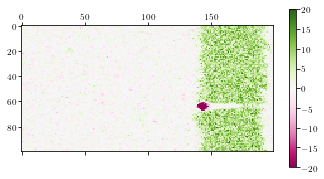

In [60]:
win=3
v0=20
plt.matshow(X_m[::win,::win] +X_m[1::win,::win] +X_m[2::win,::win]
           +X_m[::win,1::win]+X_m[1::win,1::win]+X_m[2::win,1::win]
           +X_m[::win,2::win]+X_m[1::win,2::win]+X_m[2::win,2::win], 
            cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

# 1 box spreading

In [170]:
list_D=[0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.28]

In [171]:
df_m={}

for D in list_D:
    df_m[D]=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/1nei/t_destab_D_v3/D%s/f_profiles.dat'%(D))
    

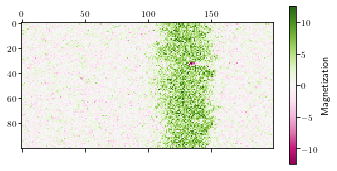

In [205]:
t0=11

X_m=df_m[0.16][t0*100:(t0+1)*100,:400]

v0=np.min(np.min(X_m))/2
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
cbar=plt.colorbar()
cbar.set_label('Magnetization')
# plt.xlim(370,550)

plt.savefig('destab_band_spread_1box.pdf', dpi=400);

In [309]:
k=1
df_m_1box_low_D=pd.read_csv('1nei/f_profiles_m_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(200)], index_col=False, dtype=np.float64)

k=0
df_m_9box_low_D=pd.read_csv('9nei/f_profiles_m_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)

df_m_1box_high_D=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/1nei/t_destab_D_v3/D%s/f_profiles.dat'%(0.16))
    
    
df_m_9box_high_D=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/9nei/t_destab_D_v3/D%s/f_profiles.dat'%(0.16))


In [310]:
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.8*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

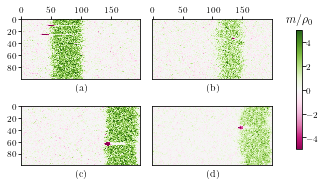

In [312]:
fig, ax = plt.subplots(2, 2)
v0=5
xlab=0.45
ylab=-0.2



kt=50
t0=np.unique(df_m_1box_low_D.t)[kt]
X_m=df_m_1box_low_D[df_m_1box_low_D.t==t0].drop(columns=['t']).values
X_m/=3
img=ax[0][0].matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
ax[0][0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0][0].text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax[0][0].transAxes)


kt=60
t0=np.unique(df_m_9box_low_D.t)[kt]
X_m=df_m_9box_low_D[df_m_9box_low_D.t==t0].drop(columns=['t']).values
X_m/=3
X_m=X_m[::win,::win] +X_m[1::win,::win] +X_m[2::win,::win]+X_m[::win,1::win]+X_m[1::win,1::win]+X_m[2::win,1::win]+X_m[::win,2::win]+X_m[1::win,2::win]+X_m[2::win,2::win]
img=ax[1][0].matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

ax[1][0].set_xticks([])
ax[1][0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1][0].text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax[1][0].transAxes)


t0=11
X_m=df_m_1box_high_D[t0*100:(t0+1)*100,:400]
X_m/=3
img=ax[0][1].matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
ax[0][1].set_yticks([])
ax[0][1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0][1].text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax[0][1].transAxes)


t0=11
X_m=df_m_9box_high_D[t0*300:(t0+1)*300,:1200]
X_m=X_m[::win,::win]+X_m[1::win,::win]+X_m[2::win,::win]+X_m[::win,1::win]+X_m[1::win,1::win]+X_m[2::win,1::win]+X_m[::win,2::win]+X_m[1::win,2::win]+X_m[2::win,2::win]
X_m/=3
img=ax[1][1].matshow(np.roll(X_m, 40, axis=0), cmap='PiYG', vmin=-v0, vmax=v0)
ax[1][1].set_yticks([])
ax[1][1].set_xticks([])
ax[1][1].text(s=r'$\mathrm{(d)}$', x=xlab, y=ylab, transform=ax[1][1].transAxes)


cbar=plt.colorbar(img, ax=ax[:,1], location='right', anchor=(-1.5,0.4), shrink=0.8)
#plt.tight_layout(pad=0.01)
plt.subplots_adjust(left=0.1,
bottom=0.05,
    right=0.73,
    top=0.9,
    wspace=0.1,
    hspace=0.07,)
cbar.ax.set_title(r'$m/\rho_{\rm 0}$', rotation=0)

plt.savefig('destab_band_onlatt.pdf', dpi=400);

# Vertical spreading

In [314]:
from scipy import ndimage

In [315]:
def mean_filter(X):
    return((np.roll(X, 1, axis=0)+np.roll(X, -1, axis=0)+np.roll(X, 1, axis=1)+np.roll(X, -1, axis=1)+X)/5)

In [330]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [331]:
prof_destab_1={}
for D in list_D:
    try:
        prof_destab_1[D]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/1nei/t_destab_D_v3/D%s/f_profiles.dat'%str(D), sep=' ', names=np.arange(200), index_col=False)
        print(D, prof_destab_1[D].shape[0]//100)
    except: 
        pass

0.005 50
0.01 50
0.02 50
0.04 50
0.06 50
0.08 50
0.1 50
0.12 50
0.14 50
0.16 50
0.18 50
0.2 50
0.22 42
0.28 33
0.3 21
0.32 50
0.34 44
0.36 44
0.38 48
0.4 50


In [332]:
mag_thresh=6.6
vertical_sizes_1={}
vertical_sizes_9={}

std_1={}

for D in list_D[:12]:
    vertical_sizes_1[D]=[]
    vertical_sizes_9[D]=[]
    for k in range(prof_destab_1[D].shape[0]//100):
        try:
            X=prof_destab_1[D].values[k*100:(k+1)*100,:]
            lab_array, ng = ndimage.label((mean_filter(X)<-mag_thresh), np.ones((3,3)))
            lab, nlab = np.unique(lab_array, return_counts=True)
            X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
            l=np.sum(np.sum(X_clust, axis=1)!=0)
            vertical_sizes_1[D].append(l)
            
        except:
            pass#print(D,k)
        
#     for k in range(prof_destab_9[D].shape[0]//300):
#         try:
#             X=prof_destab_9[D].values[k*300:(k+1)*300,:]
#             lab_array, ng = ndimage.label((mean_filter(X)<-2), np.ones((3,3)))
#             lab, nlab = np.unique(lab_array, return_counts=True)
#             X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
#             vertical_sizes_9[D].append(np.sum(np.sum(X_clust, axis=1)!=0))
#         except:
#             print(9, D, k)

In [818]:
fig_width_pt = 200  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.1*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

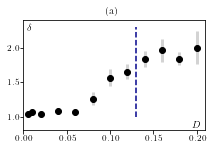

In [820]:
plt.text(s=r'$\mathrm{(a)}$', x=0.45, y=1.05, transform=plt.gca().transAxes)

plt.errorbar(x=list(vertical_sizes_1), 
             y=[np.mean(list(vertical_sizes_1[D])) for D in vertical_sizes_1], 
             yerr=[np.std(list(vertical_sizes_1[D]))/np.sqrt(len(list(vertical_sizes_1[D]))) for D in vertical_sizes_1],
             color='black',
             fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0)

plt.xlim(0.,0.21)
plt.ylim(0.8, 2.4)
plt.xlabel(r'$D$', labelpad=-22, x=0.95)
plt.ylabel(r'$\delta$', labelpad=-22, y=0.88, rotation=0)

plt.vlines(0.13, 1.0, 2.3, linestyle='--', colors='darkblue')

plt.tight_layout(pad=0.01)

plt.savefig('vertical_spreading.pdf');

# Destab times

In [368]:
t_destab_9={}
mean_t_9=[]
std_t_9=[]

t_destab_1={}
mean_t_1=[]
std_t_1=[]


for D in list_D:
    try:
        t_destab_9[D]=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/9nei/t_destab_D_v3/D%s/f_td.dat'%str(D))
        mean_t_9.append(np.mean(t_destab_9[D]))
        std_t_9.append(np.std(t_destab_9[D]))
        print(D, t_destab_9[D].shape[0])
    except: 
        print(9,D)
        
for D in list_D:
    try:
        t_destab_1[D]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D//1nei/t_destab_D_v3/D%s/f_td.dat'%str(D)).values
        mean_t_1.append(np.mean(t_destab_1[D]))
        std_t_1.append(np.std(t_destab_1[D]))
    except: 
        mean_t_1.append(np.nan)
        std_t_1.append(np.nan)

        print(1,D)

0.005 50
0.01 50
0.02 50
0.04 50
0.06 50
0.08 50
0.1 50
0.12 50
0.14 50
0.16 50
0.18 30
0.2 25
0.22 13
9 0.24
9 0.26
0.28 2
0.3 3
0.32 3
0.34 0
9 0.36
9 0.38
0.4 0
1 0.24
1 0.26


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/critical_D/9nei/t_destab_D_v3/D0.34/f_td.dat"
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/invites/benvegnen/anaconda

In [401]:
a,b = np.polyfit(list(t_destab_1)[:11], np.log(mean_t_1[:11]),1)

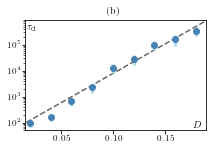

In [821]:
plt.text(s=r'$\mathrm{(b)}$', x=0.45, y=1.05, transform=plt.gca().transAxes)

plt.errorbar(list(t_destab_1), mean_t_1[:len(list(t_destab_1))], 
             yerr=3*np.array(std_t_1[:len(list(t_destab_1))])/np.sqrt([t_destab_1[tD].shape[0] if t_destab_1[tD].shape!=() else 1 for tD in t_destab_1]),
             color='steelblue',
             fmt='o',
             ecolor='lightblue', elinewidth=3, capsize=0, zorder=10)

vec_D=np.linspace(0.01, 0.2, 100)
plt.semilogy(vec_D, np.exp(a*vec_D+b), 'k--', alpha=0.6);
plt.xlim(0.015,0.19)
plt.ylim(5e1, 0.9e6)

plt.xlabel(r'$D$', labelpad=-22, x=0.95)
plt.ylabel(r'$\tau_{\rm d}$', labelpad=-24, y=0.88, rotation=0)

plt.tight_layout(pad=0.01)

plt.savefig('tau_d_D.pdf');

# Vectorial m snapshots

In [413]:
list_t=np.array([0,20,40,80])

In [459]:
snap={}
for t in list_t:
    snap[t]=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/angle_vect_m_t%d_alpha1.dat'%t)

In [460]:
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.3*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

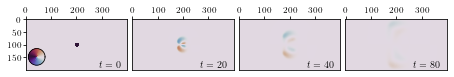

In [461]:
fig, ax = plt.subplots(1,4)

xmin, xmax= 200,400
v0=0.5
xlab,ylab=0.67,0.05

azimuths = np.arange(-180, 181, 1)
zeniths = np.arange(0, 20, 1)
values = azimuths * np.ones((20, 361))

ax2 = fig.add_axes([-0.025, 0.2, 0.2, 0.2], polar=True,)

ax2.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap='twilight_shifted')
ax2.set_yticks([])
ax2.set_xticks([])

t=0
img=ax[0].matshow(snap[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0].text(s=r'$t=%d$'%t, x=xlab+0.05, y=ylab, transform=ax[0].transAxes)
ax[0].set_xticks([0,100,200,300])

t=20
img=ax[1].matshow(snap[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[1].transAxes)
ax[1].set_yticks([])
ax[1].set_xticks([0,100,200,300])

t=40
img=ax[2].matshow(snap[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[2].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[2].transAxes)
ax[2].set_yticks([])
ax[2].set_xticks([0,100,200,300])

t=80
img=ax[3].matshow(snap[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[3].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[3].transAxes)
ax[3].set_yticks([])
ax[3].set_xticks([0,100,200,300])

plt.subplots_adjust(left=0.05,
bottom=0.0,
    right=0.99,
    top=0.9,
    wspace=0.05,
    hspace=0.,)
#plt.tight_layout(True)

plt.savefig('destab_vect_m.pdf', dpi=400);


# Scalar m snapshots

In [465]:
list_t=np.array([0,20,40,80,160])

In [466]:
snap2={}
for t in list_t:
    snap2[t]=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/angle_vect_m_t%d_alpha0.dat'%t)

In [463]:
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.3*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

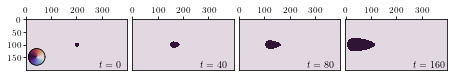

In [478]:
fig, ax = plt.subplots(1,4)

xmin, xmax= 200,400
v0=0.5
xlab,ylab=0.67,0.05

azimuths = np.arange(-180, 181, 1)
zeniths = np.arange(0, 20, 1)
values = azimuths * np.ones((20, 361))

ax2 = fig.add_axes([-0.025, 0.2, 0.2, 0.2], polar=True,)

ax2.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap='twilight_shifted')
ax2.set_yticks([])
ax2.set_xticks([])

t=0
img=ax[0].matshow(snap2[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0].text(s=r'$t=%d$'%t, x=xlab+0.05, y=ylab, transform=ax[0].transAxes)
ax[0].set_xticks([0,100,200,300])

t=40
img=ax[1].matshow(snap2[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[1].transAxes)
ax[1].set_yticks([])
ax[1].set_xticks([0,100,200,300])

t=80
img=ax[2].matshow(snap2[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[2].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[2].transAxes)
ax[2].set_yticks([])
ax[2].set_xticks([0,100,200,300])

t=160
img=ax[3].matshow(snap2[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[3].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[3].transAxes)
ax[3].set_yticks([])
ax[3].set_xticks([0,100,200,300])

plt.subplots_adjust(left=0.05,
bottom=0.0,
    right=0.99,
    top=0.9,
    wspace=0.05,
    hspace=0.,)
#plt.tight_layout(True)

plt.savefig('destab_scalar_m.pdf', dpi=400);


# alpha=0.1 snapshots

In [630]:
!pip install pycolormap-2d

     |################################| 1.3 MB 6.5 MB/s eta 0:00:01
ERROR: nptyping 2.5.0 has requirement numpy==1.21.5; python_version < "3.8", but you'll have numpy 1.18.1 which is incompatible.
  Attempting uninstall: zipp
    Found existing installation: zipp 2.2.0
    Uninstalling zipp-2.2.0:
      Successfully uninstalled zipp-2.2.0


In [631]:
from pycolormap_2d import ColorMap2DBremm

# Create the color map object.
cmap = ColorMap2DBremm(range_x=(-10, 30), range_y=(1, 11))

# Get the color value.
color = cmap(10.0, 8.5)

In [632]:
color

array([191, 105, 133], dtype=uint8)

In [719]:
list_t3=np.array([50,150,260,300])

In [670]:
snap3_angle={}
snap3_dens={}
for t in list_t3:
    snap3_angle[t]=np.loadtxt('angle_vect_m_t%d_alpha01.dat'%t)
    snap3_dens[t]=np.loadtxt('density_vect_m_t%d_alpha01.dat'%t)

In [471]:
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.3*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

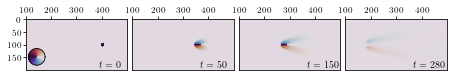

In [477]:
fig, ax = plt.subplots(1,4)

xmin, xmax= 200,400
v0=0.5
xlab,ylab=0.67,0.05

azimuths = np.arange(-180, 181, 1)
zeniths = np.arange(0, 20, 1)
values = azimuths * np.ones((20, 361))

ax2 = fig.add_axes([-0.025, 0.2, 0.2, 0.2], polar=True,)

ax2.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap='twilight_shifted')
ax2.set_yticks([])
ax2.set_xticks([])

t=0
img=ax[0].matshow(snap3[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0].text(s=r'$t=%d$'%t, x=xlab+0.05, y=ylab, transform=ax[0].transAxes)
ax[0].set_xticks([100,200,300,400])
ax[0].set_xlim(100,500)

t=50
img=ax[1].matshow(snap3[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[1].transAxes)
ax[1].set_yticks([])
ax[1].set_xticks([100,200,300,400])
ax[1].set_xlim(100,500)

t=150
img=ax[2].matshow(snap3[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[2].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[2].transAxes)
ax[2].set_yticks([])
ax[2].set_xticks([100,200,300,400])
ax[2].set_xlim(100,500)

t=280
img=ax[3].matshow(snap3[t], cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
ax[3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[3].text(s=r'$t=%d$'%t, x=xlab, y=ylab, transform=ax[3].transAxes)
ax[3].set_yticks([])
ax[3].set_xticks([100,200,300,400])
ax[3].set_xlim(100,500)

plt.subplots_adjust(left=0.05,
bottom=0.0,
    right=0.99,
    top=0.9,
    wspace=0.05,
    hspace=0.,)
#plt.tight_layout(True)

plt.savefig('destab_alpha01_m.pdf', dpi=400);


# 2D colorbar

In [659]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt



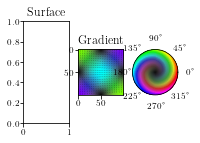

In [695]:
r = np.linspace(0, np.pi, num=100)
x, y = np.meshgrid(r, r)
z = np.sin(y) * np.cos(x)

fig = plt.figure()

ax = fig.add_subplot(1, 3, 1)
# ax.imshow(z)
ax.set_title("Surface")

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Gradient")

# create gradient
grad_y, grad_x = np.gradient(z)

# calculate length
gradabs = np.sqrt(np.square(grad_x) + np.square(grad_y))
max_abs = np.max(gradabs)

# calculate angle component
gradang = np.arctan2(grad_y, grad_x)

def grad_to_rgb(angle, absolute):
    """Get the rgb value for the given `angle` and the `absolute` value

    Parameters
    ----------
    angle : float
        The angle in radians
    absolute : float
        The absolute value of the gradient
    
    Returns
    -------
    array_like
        The rgb value as a tuple with values [0..1]
    """
    global max_abs

    # normalize angle
    angle = angle % (2 * np.pi)
    if angle < 0:
        angle += 2 * np.pi

    return matplotlib.colors.hsv_to_rgb((angle / 2 / np.pi, 
                                         absolute / max_abs, 
                                         absolute / max_abs))

# convert to colors via hsv
grad = np.array(list(map(grad_to_rgb, gradang.flatten(), gradabs.flatten())))

# reshape
grad = grad.reshape(tuple(list(z.shape) + [3]))

ax.imshow(grad)

n = 5
gx, gy = np.meshgrid(np.arange(z.shape[0] / n), np.arange(z.shape[1] / n))
ax.quiver(gx * n, gy * n, grad_x[::n, ::n], grad_y[::n, ::n])

# plot color wheel
# Generate a figure with a polar projection, inspired by
# https://stackoverflow.com/a/48253413/5934316
ax = fig.add_subplot(1, 3, 3, projection='polar')

n = 200  # the number of secants for the mesh
t = np.linspace(0, 2 * np.pi, n)
r = np.linspace(0, max_abs, n)
rg, tg = np.meshgrid(r, t)
c = np.array(list(map(grad_to_rgb, tg.T.flatten(), rg.T.flatten())))
cv = c.reshape((n, n, 3))

m = ax.pcolormesh(t, r, cv[:,:,1], color=c, shading='auto')
m.set_array(None)
ax.set_yticklabels([])

plt.show()

In [661]:
plt.imshow(snap3_angle[t])

TypeError: unhashable type: 'numpy.ndarray'

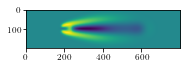

In [671]:
plt.imshow(snap3_dens[t])

In [735]:
# calculate length
t=260
min_abs = np.min([np.min(snap3_dens[x]) for x in list_t3])

gradabs = snap3_dens[t]-min_abs
max_abs = np.max([np.max(snap3_dens[x]) for x in list_t3])

# calculate angle component
gradang = np.pi-snap3_angle[t]

In [736]:
grad = np.array(list(map(grad_to_rgb, gradang.flatten(), gradabs.flatten())))

grad = grad.reshape(tuple(list(snap3_dens[t].shape) + [3]))


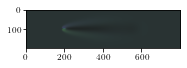

In [737]:
plt.imshow(grad)
plt.savefig('test.pdf', dpi=400);


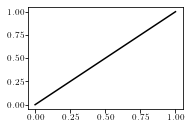

In [697]:
plt.plot([0,1], [0,1], '-', color=grad_to_rgb(50, 0))